## Dataset MNIST

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 155497625.95it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 8259627.29it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33950356.87it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3129707.37it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



##Visualisasi Data MNIST

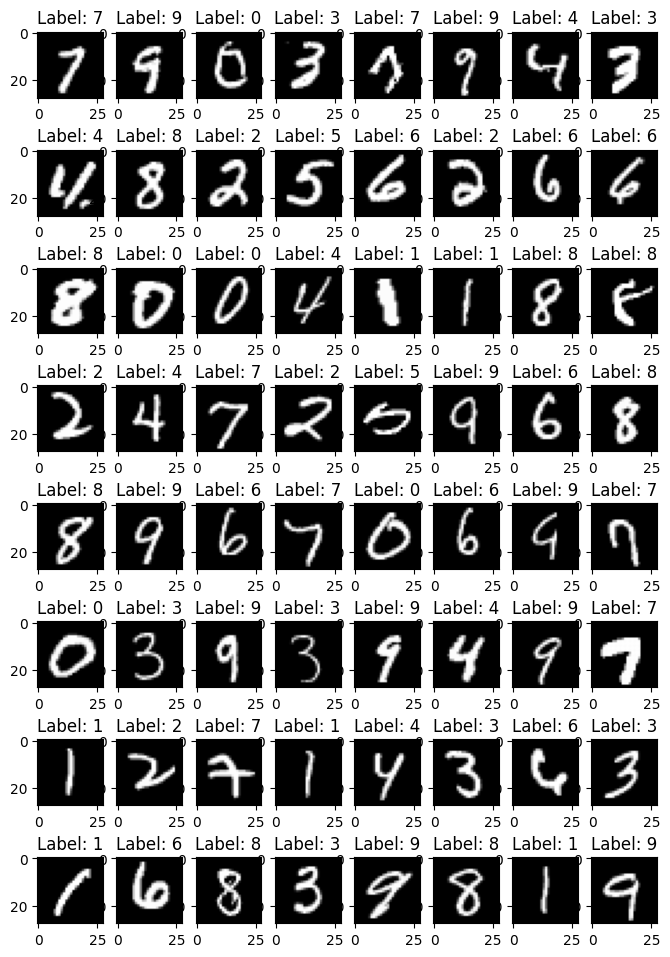

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(train_loader)
images, labels = next(dataiter)

fig, axes = plt.subplots(8, 8, figsize=(8, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i][0], cmap='gray')
    ax.set_title(f'Label: {labels[i].item()}')
plt.show()


## Desain Model Neural Network:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetwork()


## Pengaturan Hyperparameter:

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epoch = 15

## Looping untuk training model

In [ ]:
for epoch in range(epoch):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')


Epoch 1, Loss: 0.39582931504511376
Epoch 2, Loss: 0.1814716398112301
Epoch 3, Loss: 0.12947964390465763
Epoch 4, Loss: 0.10399949435355153
Epoch 5, Loss: 0.08851402265919266
Epoch 6, Loss: 0.07665874238120023
Epoch 7, Loss: 0.06779400535252517
Epoch 8, Loss: 0.06505557150641547
Epoch 9, Loss: 0.05481669818361931
Epoch 10, Loss: 0.052736516398720755
Epoch 11, Loss: 0.046814654386097956
Epoch 12, Loss: 0.04210202914063455
Epoch 13, Loss: 0.04159706708636812
Epoch 14, Loss: 0.03658867607597569
Epoch 15, Loss: 0.03414163976985423


## Evaluasi Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

accuracy = accuracy_score(all_labels, all_preds)
print('Akurasi: {:.2f}%'.format(accuracy * 100))
print("")

cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix: ")
print(cm)
print("")

classification_rep = classification_report(all_labels, all_preds)
print('Laporan Klasifikasi:')
print(classification_rep)

Akurasi: 97.91%

Confusion Matrix: 
[[ 965    0    2    1    3    3    1    1    2    2]
 [   0 1123    3    2    0    1    1    2    2    1]
 [   1    0 1013    4    3    0    1    9    1    0]
 [   0    0    5  985    0    8    0    5    5    2]
 [   0    0    2    0  967    0    3    3    0    7]
 [   3    0    0    5    1  873    3    0    5    2]
 [   2    3    2    0    5    8  937    0    1    0]
 [   0    4    4    0    2    0    0 1010    1    7]
 [   2    0    3    9    4    8    1    2  938    7]
 [   2    1    0    2   13    2    3    5    1  980]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.99      0.9

## Penjelesan hasil performa model

Hasil diatas, yang sudah diberikan menggambarkan hasil dari pelatihan model deep learning untuk mengklasifikasikan angka tulisan tangan dari dataset MNIST. Model yang digunakan adalah sebuah NeuralNetwork yang memiliki 3 lapisan tersembunyi yang terdiri dari 128 neuron serta memiliki arsitektur 128 -> 64 -> 10 (input).Selama proses pelatihan, model melewati 15 epoch, dengan nilai loss yang terus berkurang seiring berjalannya waktu, menunjukkan kemajuan yang signifikan dalam pelatihan model. Hasil akhir menunjukkan tingkat akurasi model sekitar 97,91%.

Selain itu, confusion matrix dan laporan klasifikasi memberikan gambaran rinci tentang performa model untuk setiap kelas digit, mencakup metrik seperti precision, recall, dan nilai F1. Model ini menunjukkan kemampuan yang luar biasa dalam mengenali digit tulisan tangan, dengan tingkat akurasi yang tinggi dan performa yang konsisten untuk semua kelas digit. Hasil ini menegaskan bahwa model ini sangat efektif dalam tugas klasifikasi digit.